## Poročilo vaja 1.2
#### Opisna statistika v anketi za nogometne trenerje

Imamo podatke ankete "**Anketa za nogometne trenerje**", ki je bila narejena v 1nki.
1. Uvoz podatkov
   - Komentiraj razliko med excel in SPSS podatki iz ankete
2. Izvedi opisne statistike raziskave, na prečiščenih podatkih iz ankete, ki so v datoteki *anketa_precisceni 26 12 nogomet trenerji.sav*:
   - Značilnosti vzorca raziskave: demografske lastnosti, licenca, trenerske izkušnje, igralske izkušnje, izobrazba
   - Odnos do poklica: pomembni dejavniki za trenerski poklic, pomembni dejavniki zadovoljstva
   - Glavni problemi pri delu
3. Grafi:
   - Nekatere opisne statistike iz 2. točke opremi še z grafi.

In [42]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import re
import warnings

path = os.getcwd()
df = pd.read_excel(path + '\\data\\anketa114621-2024-03-04.xlsx', sheet_name='Podatki')
df_labels = pd.read_excel(path + '\\data\\anketa114621-2024-03-04.xlsx', sheet_name='Labele odgovorov')

df_spss = pd.read_spss(path + '\\data\\anketa_precisceni 26 12 nogomet trenerji.sav')

questions = df.iloc[0]

pd.set_option('display.max_columns', 500)

In [43]:
# Prikaz prvih 5 vrstic podatkov uvoženih iz .xlsl datoteke
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q14_4_text,Q15,Q15_3_text,Q16,Q17a,Q17b,Q17c,Q17d,Q17e,Q17f,Q17g,Q18a,Q18b,Q18c,Q19a,Q20,Q21a_1,Q21a_2,Q21a_3,Q21a_4,Q21b_1,Q21b_2,Q21b_3,Q21b_4,Q21c_1,Q21c_2,Q21c_3,Q21c_4,Q21d_1,Q21d_2,Q21d_3,Q21d_4,Q21e_1,Q21e_2,Q21e_3,Q21e_4,Q21f_1,Q21f_2,Q21f_3,Q21f_4,Q21g_1,Q21g_2,Q21g_3,Q21g_4,Q21h_1,Q21h_2,Q21h_3,Q21h_4,Q21i_1,Q21i_2,Q21i_3,Q21i_4,Q21j_1,Q21j_2,Q21j_3,Q21j_4,Q21k_1,Q21k_2,Q21k_3,Q21k_4,Q22a,Q22b,Q22c,Q22d,Q22e,Q22f,Q22g,Q22h,Q22i,Q22j,Q22k,Q22l,Q22m,Q22n,Q22o,Q22p,Q22q,Q22r,Q22s,Q22t,Q22u,Q23a,Q23b,Q23c,Q23d,Q23e,Q23f,Q23g,Q23h,Q23i,Q24a,Q24b,Q24c,Q24d,Q24e,Q24f,Q24g,Q24h,Q25,Q26a,Q26b,Q26c,Q26d,Q26e,Q26f,Q26g,Q26h,Q26i,Q26i_text,Q27a_1,Q27a_2,Q27a_3,Q27a_4,Q27b_1,Q27b_2,Q27b_3,Q27b_4,Q27c_1,Q27c_2,Q27c_3,Q27c_4,Q27d_1,Q27d_2,Q27d_3,Q27d_4,Q27e_1,Q27e_2,Q27e_3,Q27e_4,Q28,Q28_3_text,Q29a,Q29b,Q29c,Q29d,Q29e,Q30a,Q30b,Q30c,Q30d,Q30e,Q30f,Q30g,Q30h,Q30i,Q31a,Q31b,Q31c,Q31d,Q31e,Q31f,Q31g,Q31h,Q31i,Q31j,Q31k,Q31l,Q31m,Q32a,Q32b,Q32c,Q32d,Q32e,Q32f,Q32g,Q32h,Q33a,Q33b,Q33c,Q33d,Q33e,Q33f,Q33g,Q33h,Q33i,Q34a,Q34b,Q34c,Q34d,Q34e,Q34f,Q34g,Q34h,Q34i,Q34j,Q34k,Q34l,Q34m,Q35a,Q35b,Q35c,Q35d,Q35e,Q36a,Q36b,Q36c,Q36d,Q36e,Q36f,Q36g,Q36h,Q37a,Q37b,Q37c,Q37d,Q37e,Q37f,Q37g,Q37h,Q37i,Q37j,Q37k,Q37l,Q37m,Q37n,Q37o,Q38a,Q38b,Q38c,Q38d,Q38e,Q38f,Q38g,Q38h,Q38i,Q38j,Q38k,Q38l,Q38l_text,Q39,Q40,Q40_3_text,Q41,Q42,Q42_13_text,Q43,Q43_4_text,Q44,Q44_3_text
0,Koliko ur na teden delate kot trener (s svojo ...,Koliko let že delate kot trener?,Koliko let že delate kot trener v trenutnem kl...,Kakšna je vaša trenerska usposboljenost?,Kakšne je vaša trenutna trenerska licenca (sez...,Koliko dni na teden ste na nogometnem igrišču ...,Koliko ur na teden preživite v nogometnem klub...,Koliko ur od tega je namenjeno na teden za pr...,Koliko ur na teden delate doma za svojo ekipo ...,Ocenite koliko ur na teden porabite za pridobi...,Ali ste bili tudi sami aktiven nogometaš?,"Če ste bili ali ste aktiven nogometaš, na kate...",Koliko let ste aktivno igrali nogomet?,Na katerem nivoju tekmuje vaša ekipa?,Drugo:,Trenutno ste trener:,Drugo:,Katero starostno kategorijo trenutno trenirate?,člane,U19,U17,U15,U13,U10,U8,Po mojih dosedanjih izkušnjah s trenerstvom bi...,Vodenje nogometne ekipe ustreza mojim nagnjenjem.,"V času mojega trenerstva pogosto mislim na to,...",Moji dosedanji trenerski dosežki so,"Ocenite število oseb, ki dela v vašem klubu?",Polna zaposlitev,Polovična zaposlitev,honorarno,volontersko/neplačano,Polna zaposlitev,Polovična zaposlitev,honorarno,volontersko/neplačano,Polna zaposlitev,Polovična zaposlitev,honorarno,volontersko/neplačano,Polna zaposlitev,Polovična zaposlitev,honorarno,volontersko/neplačano,Polna zaposlitev,Polovična zaposlitev,honorarno,volontersko/neplačano,Polna zaposlitev,Polovična zaposlitev,honorarno,volontersko/neplačano,Polna zaposlitev,Polovična zaposlitev,honorarno,volontersko/neplačano,Polna zaposlitev,Polovična zaposlitev,honorarno,volontersko/neplačano,Polna zaposlitev,Polovična zaposlitev,honorarno,volontersko/neplačano,Polna zaposlitev,Polovična zaposlitev,honorarno,volontersko/neplačano,Polna zaposlitev,Polovična zaposlitev,honorarno,volontersko/neplačano,Dobri medsebojni odnosi z igralci/igralkami,Dobri medsebojni odnosi med trenerji,Dobri medsebojni odnosi z vodstvom kluba,Izpolnjevanje vizije kluba,Finančna stabilnost kluba,Organiziranost kluba,Možnost napredovanja,Strokovna usposobljenost,Časovna fleksibilnost,Predhodne izkušnje in dosežki,Prepoznavnost v družbi,visok dohodek,veselje do poklica,aktivno se sam oz. sem se ukvarjal z nogometom,igralce naučiti nogometa,ustvariti dobrega igralca,Dobro vzdušje v ekipi,Visok ugled v družbi,odločanje o samem sebi,Odnos z navijači,Odnos z mediji,uresničevanje svojih idej v praksi,možnost raznovrstnega treniranja,pogoji za trening in tekmovanje,stiki z drugimi strokovnjaki,ustvarjalno delo,rezultatski uspehi,napredek mladih nogometašev,podpora vodstvenih struktur v klubu,Podpora vodilnih na NZS,medicina,pedagogika,psiho

In [44]:
# Prikaz prvih 5 vrstic podatkov uvoženih iz .sav datoteke
df_spss.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q14_4_text,Q15,Q15_3_text,Q16,Q17a,Q17b,Q17c,Q17d,Q17e,Q17f,Q17g,Q18a,Q18b,Q18c,Q19a,Q20,Q21a_1,Q21a_2,Q21a_3,Q21a_4,Q21b_1,Q21b_2,Q21b_3,Q21b_4,Q21c_1,Q21c_2,Q21c_3,Q21c_4,Q21d_1,Q21d_2,Q21d_3,Q21d_4,Q21e_1,Q21e_2,Q21e_3,Q21e_4,Q21f_1,Q21f_2,Q21f_3,Q21f_4,Q21g_1,Q21g_2,Q21g_3,Q21g_4,Q21h_1,Q21h_2,Q21h_3,Q21h_4,Q21i_1,Q21i_2,Q21i_3,Q21i_4,Q21j_1,Q21j_2,Q21j_3,Q21j_4,Q21k_1,Q21k_2,Q21k_3,Q21k_4,Q22a,Q22b,Q22c,Q22d,Q22e,Q22f,Q22g,Q22h,Q22i,Q22j,Q22k,Q22l,Q22m,Q22n,Q22o,Q22p,Q22q,Q22r,Q22s,Q22t,Q22u,Q23a,Q23b,Q23c,Q23d,Q23e,Q23f,Q23g,Q23h,Q23i,Q24a,Q24b,Q24c,Q24d,Q24e,Q24f,Q24g,Q24h,Q25,Q26a,Q26b,Q26c,Q26d,Q26e,Q26f,Q26g,Q26h,Q26i,Q26i_text,Q27a_1,Q27a_2,Q27a_3,Q27a_4,Q27b_1,Q27b_2,Q27b_3,Q27b_4,Q27c_1,Q27c_2,Q27c_3,Q27c_4,Q27d_1,Q27d_2,Q27d_3,Q27d_4,Q27e_1,Q27e_2,Q27e_3,Q27e_4,Q28,Q28_3_text,Q29a,Q29b,Q29c,Q29d,Q29e,Q30a,Q30b,Q30c,Q30d,Q30e,Q30f,Q30g,Q30h,Q30i,Q31a,Q31b,Q31c,Q31d,Q31e,Q31f,Q31g,Q31h,Q31i,Q31j,Q31k,Q31l,Q31m,Q32a,Q32b,Q32c,Q32d,Q32e,Q32f,Q32g,Q32h,Q33a,Q33b,Q33c,Q33d,Q33e,Q33f,Q33g,Q33h,Q33i,Q34a,Q34b,Q34c,Q34d,Q34e,Q34f,Q34g,Q34h,Q34i,Q34j,Q34k,Q34l,Q34m,Q35a,Q35b,Q35c,Q35d,Q35e,Q36a,Q36b,Q36c,Q36d,Q36e,Q36f,Q36g,Q36h,Q37a,Q37b,Q37c,Q37d,Q37e,Q37f,Q37g,Q37h,Q37i,Q37j,Q37k,Q37l,Q37m,Q37n,Q37o,Q38a,Q38b,Q38c,Q38d,Q38e,Q38f,Q38g,Q38h,Q38i,Q38j,Q38k,Q38l,Q38l_text,Q39,Q40,Q40_3_text,Q41,Q42,Q42_13_text,Q43,Q43_4_text,Q44,Q44_3_text,NOVAizobr_stopnja,NOVA_veda,Q18a_r,Q18b_r,O18c_r
0,9.0,15.0,15.0,Trener UEFA B,Trener UEFA B,4.0,20.0,10.0,3.0,1.0,še danes,na regionalnem nivoju,30.0,na deželnem/regionalnem nivoju,-2,moške ekipe,-2,U13,izbran,ni izbran,ni izbran,ni izbran,izbran,izbran,izbran,DA,DA,DA,DOBRI,10.0,NaN,NaN,5.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,Zelo je pomembno,Je pomembno,Zelo je pomembno,"Niti je, niti ni pomembno",Zelo je pomembno,Zelo je pomembno,Je pomembno,Zelo je pomembno,Je pomembno,Zelo je pomembno,Je pomembno,Je pomembno,Zelo je pomembno,Zelo je pomembno,Zelo je pomembno,Je pomembno,Zelo je pomembno,Je pomembno,Je pomembno,"Niti je, niti ni pomembno","Niti je, niti ni pomembno",Zelo je pomembno,Zelo je pomembno,Zelo je pomembno,Je pomembno,Je pomembno,Je pomembno,Zelo je pomembno,Zelo je pomembno,Ni pomembno,Je pomembno,Zelo je pomembno,Zelo je pomembno,Zelo je pomembno,Je pomembno,Zelo je pomembno,Je pomembno,Zelo je pomembno,Ne,ni izbran,izbran,ni izbran,ni izbran,ni izbran,ni izbran,izbran,izbran,ni izbran,-2,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NE,-2,NaN,NaN,NaN,NaN,NaN,Se strinjam,Popolnoma se strinjam,Se strinjam,Se strinjam,Se strinjam,Se strinjam,Se ne strinjam,Se strinjam,Se strinjam,Zelo je pomembno,Je pomembno,Zelo je pomembno,"Niti je, niti ni pomembno",Je pomembno,Zelo je pomembno,"Niti je, niti ni pomembno",Je pomembno,Je pomembno,Zelo je pomembno,Zelo je pomembno,Ni pomembno,Je pomembno,Niti malo ne drži,Niti malo ne drži,Drži,Niti malo ne drži,Ne drži,Niti malo ne drži,Niti malo ne drži,Niti malo ne drži,NE,NE,NE,DA,NE,NE,NE,NE,NE,Zelo je pomembno,Zelo je pomembno,Zelo je pomembno,"Niti je, niti ni pomembno",Je pomembno,Zelo je pomembno,Zelo je pomembno,Zelo je pomembno,Je pomembno,"Niti je, niti ni pomembno","Niti je, niti ni pomembno",Je pomembno,Je pomembno,Se ne strinjam,Se strinjam,Se strinjam,Se strinjam,Povsem se strinjam,Se strinjam,"Niti se ne strinjam, niti se strinjam",Popolnoma se strinjam,"Niti se ne strinjam, niti se strinjam",Popolnoma se strinjam,Popolnoma se strinjam,Popolnoma se strinjam,Se strinjam,Zelo je pomembno,Zelo je pomembno,Je pomembno,Ni pomembno,Zelo je pomembno,Je pomembno,Je pomembno,Je pomembno,Je pomembno,Sploh ni pomembno,Je pomembno,Je pomembno,"Niti ni pomembno, niti je pomembno",Zelo je pomembno,Zelo je pomembno,Po koncu kariere,Med kariero,Med kariero,Med kariero,Po koncu kariere,Med kariero,Med kariero,Med kariero,Po koncu kar

In [45]:
df = df.drop(labels=0, axis='index')
df_labels = df_labels.drop(labels=0, axis='index')

#### 1. Komentiraj razliko med excel in SPSS podatki iz ankete.
Excel podatki so sestavljeni iz dveh razpredelnic in imajo eno vrstico več. Prva razpredelnica vsebuje odgovore, ki so številsko kodirani, razen tisti, katere so anketiranci ročno vpisali. Druga razpredelnica vsebuje dejanske odgovore, ki so jih v anketi obkrožili anketiranci. Obe razpredelnici imata dodatno vrstico, v kateri so zapisana vprašanja.

**SPSS podatki so opremljeni z metapodatki - to pomeni, da ima vsaka spremenljivka v opisu zapisano vprašanje, torej nima vrstice namenjene za vprašanje. Za analizo v spss ali jamovi je takšen način primernejši. Za analizo v R ali python pa na tak način izgubimo informacijo o vprašanjih.**

In [46]:
# funkcija, ki prečisti podatke, o letih treniranja 
def extract_years(value):
    value = str(value).lower().strip()
    
    num_match = re.search(r'(\d+)', value)
    if not num_match:
        return -1
    
    num = int(num_match.group(1))
    if 'mes' in value:
        return round(num/12)
    elif 'let' in value:
        if num > 1000:
            current_year = pd.Timestamp.now().year
            return current_year - num
        else:
            return num
    else:
        return num

In [47]:
# pridobi podatke o značilnostih vzorca
N = df.shape[0] # pandas ne šteje prve vrstice, druga pa je namenjena vprašanju, zato jo odštejemo
spol = df['Q40'].map({1:'Ženski', 2: 'Moski', 3: 'Drugo'})
stopnja_izobrazbe = pd.cut(x=df['Q41'],
                           bins=[0,2,99],
                           labels=['<= srednjesolska', '> srednjesolska'])
podrocje_izobrazbe = df['Q42'].map(lambda x: 'športno treniranje' if x == 11
                                   else ('drugo' if x > 0 else np.nan))
# np.where(df['Q42'] == 11, 'športno treniranje', 'drugo')
df['Q2_leta'] = df['Q2'].apply(extract_years)
trenerske_izkusnje = pd.cut(x=df['Q2_leta'], 
                            bins=[0, 10, 20, 30, 99],
                            labels=['< 10 let', '10-20 let', '20-30 let', '>30 let']) # leta trenerskih izkušenj
trenerska_usposobljenost = df_labels[-(df_labels.Q4 == 'neodgovorjeno vprašanje')]['Q4']
licenca = df_labels[-(df_labels.Q5 == 'neodgovorjeno vprašanje')]['Q5']
igralski_nivo = df['Q12'].map({
    1: 'reprezentančni nivo',
    2: 'državni nivo',
    3: 'regionalni nivo',
    4: 'občinski nivo'
})

#### 2. Značilnosti vzorca (Tabela 1)

V spodnji tabeli so prikazane splošne demografske značilnosti podatkov o trenerjih v Sloveniji.

In [48]:
def format_categorical(df, var):
    counts = df[var].value_counts(dropna=False).sort_index() 
    total = counts.sum()                                        # count all values
    ones = counts.get(1)                                        # count all 1s
    return f'{ones} ({(ones/total)*100:.1f}%)'
    

def summarize_categorical(var, name_row=None, labels=None):
    counts = var.value_counts(dropna=True).sort_index()
    total = counts.sum()
    rows = [[var if name_row == None else name_row, '']]  # Name row

    for val, count in counts.items():
        label = labels[val] if labels else str(val)
        percent = (count / total) * 100
        row = [f'  {label}', f'{count} ({percent:.1f}%)']
        rows.append(row)
    return rows

def bold_rows(row, bold_indices):
    if row.name in bold_indices:
        return ['font-weight: bold']*len(row)
    else:
        return ['']*len(row)

table_one = []

table_one += summarize_categorical(spol, name_row='Spol')
table_one += summarize_categorical(stopnja_izobrazbe, name_row='Stopnja izobrazbe')
table_one += summarize_categorical(podrocje_izobrazbe, name_row='Podrocje izobrazbe')
table_one += summarize_categorical(trenerske_izkusnje, name_row='Trenerske izkusnje')
table_one += summarize_categorical(trenerska_usposobljenost, name_row='Trenerska usposobljenost')
table_one += summarize_categorical(igralski_nivo, name_row='Nivo aktivnega igranja')

bold_indices = [0, 4, 7, 10, 15, 26]

table_one = pd.DataFrame(table_one, columns=['Variable', 'Summary'])
table_one.style.set_caption(f'Tabela 1: Značilnosti udeležencev študije (N = {N})')\
          .set_table_styles([
              {'selector': 'caption', 'props': [('font-size', '16px'), 
                                                ('font-weight', 'bold'), 
                                                ('border-bottom', '1px solid black'),
                                                ('width', '100%')]},
              {'selector': 'td', 'props': 'text-align: left'}
          ])\
          .apply(bold_rows, bold_indices=bold_indices, axis=1)\
          .hide(axis='columns')\
          .hide()

Spol,
Drugo,2 (0.4%)
Moski,502 (96.5%)
Ženski,16 (3.1%)
Stopnja izobrazbe,
<= srednjesolska,239 (46.1%)
> srednjesolska,280 (53.9%)
Podrocje izobrazbe,
drugo,322 (69.4%)
športno treniranje,142 (30.6%)
Trenerske izkusnje,


#### Tabela, ki prikazuje odnos do poklica (Tabela 2)


In [76]:
# odnos do poklica
q34_labels = [f'Q34{chr(i)}' for i in range(ord('a'), ord('m') + 1)]

table_two = []
for label in q34_labels:
    q = questions[label]
    valid = np.sum((df[label] > 0).values.ravel())
    missing = np.sum((df[label] < 1).values.ravel())
    mean = df[label][df[label]>0].mean().round(2)
    median = df[label][df[label]>0].median().round(2)
    mode = df[label][df[label]>0].mode()[0]
    q25, q75 = df[label][df[label]>0].quantile(0.25), df[label][df[label]>0].quantile(0.75)
    table_two.append([str(q), str(valid), str(missing), str(mean), str(mode), str(median), str(f'({q25}, {q75})')])
    
table_two = pd.DataFrame(table_two, columns=['Dejavnik', 'Veljavni odgovori (N)', 'Manjkajoči odgovori (N)', 'Povprečje', 'Modus', 'Mediana', '1 in 3 kvartil'])
table_two.style.set_caption('Tabela 2: Odnos do poklica')\
          .set_table_styles([
              {'selector': 'caption', 'props': [('font-size', '16px'), 
                                                ('font-weight', 'bold'), 
                                                ('border-bottom', '1px solid black'),
                                                ('width', '100%')]},
              {'selector': 'td', 'props': 'text-align: left;'}
          ])\
          .hide()

Dejavnik,Veljavni odgovori (N),Manjkajoči odgovori (N),Povprečje,Modus,Mediana,1 in 3 kvartil
Pogoji dela,546,289,4.47,4,4.0,"(4.0, 5.0)"
Redno plačilo za opravljeno delo,545,290,4.3,4,4.0,"(4.0, 5.0)"
Možnosti napredovanja,544,291,4.23,4,4.0,"(4.0, 5.0)"
Nenehno dokazovanje,546,289,3.88,4,4.0,"(3.0, 4.0)"
Količina stresa pri delu,544,291,3.76,4,4.0,"(3.0, 4.0)"
Spoštovanje,546,289,4.5,5,5.0,"(4.0, 5.0)"
"Priznavanje znanja, izkušenj",546,289,4.22,4,4.0,"(4.0, 5.0)"
Vrednotenje rezultatov dela,545,290,4.03,4,4.0,"(4.0, 4.0)"
Podpora vodilnih v klubu,545,290,4.44,5,4.0,"(4.0, 5.0)"
Dolgoročnost pogodbe o zaposlitvi,539,296,3.57,4,4.0,"(3.0, 4.0)"


Iz tabele je razvidno, da so v povprečju nogometni trenerji mnenja, da je najbolj pomemben dejavnik za zadovoljstvo pri delu *spoštovanje* (povprečje 4,50), najmanj pomemben pa *izpostavljenost dosežkov v medijih* (povprečje 3,03). Najbolj pogost odgovor na večino vprašanj je *je pomembno*.

#### Tabela, ki prikazuje glavne probleme pri delu (Tabela 3)

In [75]:
q32_labels = [f'Q32{chr(i)}' for i in range(ord('a'), ord('h') + 1)]

table_three = []

for label in q32_labels:
    q = questions[label]
    valid = np.sum((df[label] > 0).values.ravel())
    missing = np.sum((df[label] < 1).values.ravel())
    mean = df[label][df[label]>0].mean().round(2)
    median = df[label][df[label]>0].median().round(2)
    mode = df[label][df[label]>0].mode()[0]
    q25, q75 = df[label][df[label]>0].quantile(0.25), df[label][df[label]>0].quantile(0.75)
    table_three.append([str(q), str(valid), str(missing), str(mean), str(mode), str(median), str(f'({q25}, {q75})')])

table_three = pd.DataFrame(table_three, columns=['Dejavnik', 'Veljavni odgovori (N)', 'Manjkajoči odgovori (N)', 'Povprečje', 'Modus', 'Mediana', '1 in 3 kvartil'])
table_three.style.set_caption('Tabela 3: Problemi pri poklicu')\
          .set_table_styles([
              {'selector': 'caption', 'props': [('font-size', '16px'), 
                                                ('font-weight', 'bold'), 
                                                ('border-bottom', '1px solid black'),
                                                ('width', '100%')]},
              {'selector': 'td', 'props': 'text-align: left;'}
          ])\
          .hide()

Dejavnik,Veljavni odgovori (N),Manjkajoči odgovori (N),Povprečje,Modus,Mediana,1 in 3 kvartil
Slabi pogoji za treniranje,553,282,2.74,2,3.0,"(2.0, 4.0)"
Neurejeni medčloveški odnosi,553,282,2.25,2,2.0,"(2.0, 3.0)"
Premalo nogometašev je pripravljenih za delo,552,283,2.99,2,3.0,"(2.0, 4.0)"
Slaba organizacija,553,282,2.53,2,2.0,"(2.0, 3.0)"
"Neustrezno razporejena finančna sredstva, preveč v korist članskih moštev, premalo za mlajše kategorije",549,286,2.94,2,3.0,"(2.0, 4.0)"
Slaba infrastruktura (nogometno igrišče),552,283,2.8,2,3.0,"(2.0, 4.0)"
Nestrpnost pri doseganju ciljev,551,284,2.62,2,2.0,"(2.0, 3.0)"
Zanemarjanje razvoja lastnih igralcev,554,281,2.52,2,2.0,"(2.0, 3.0)"


Iz tabele 3 lahko razberemo, da so trenerji najbolj nevtralni (3: *niti ne drži, niti drži*) glede naslednjih dejavnikov, ki vplivajo na probleme pri poklicu: *premalo nogometašev je pripravljenih za delo* (povprečje 2,99), *naustrezno razporejena finančna sredstva* (povprečje 2,94), *slaba infrastruktura* (povprečje 2,80). Na vsa vprašanja so sicer največkrat odgovorili z 2: *Ni pomembno*.

#### 3. Grafi, ki prikazujejo ***značilnosti vzorca raziskave***.

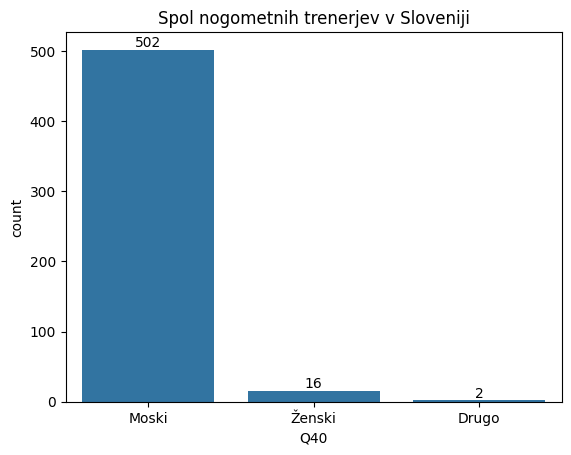

In [89]:
plt.figure()
ax = sns.countplot(data=df, x=spol)
ax.bar_label(ax.containers[0])
plt.title('Spol nogometnih trenerjev v Sloveniji')
plt.show()

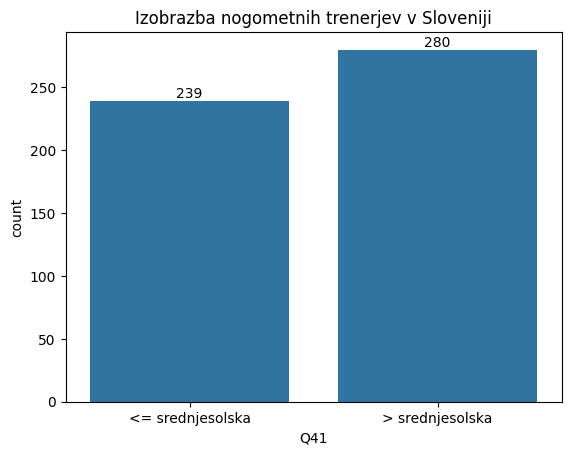

In [90]:
ax = sns.countplot(data=df, x=stopnja_izobrazbe)
ax.bar_label(ax.containers[0])
plt.title('Izobrazba nogometnih trenerjev v Sloveniji')
plt.show()

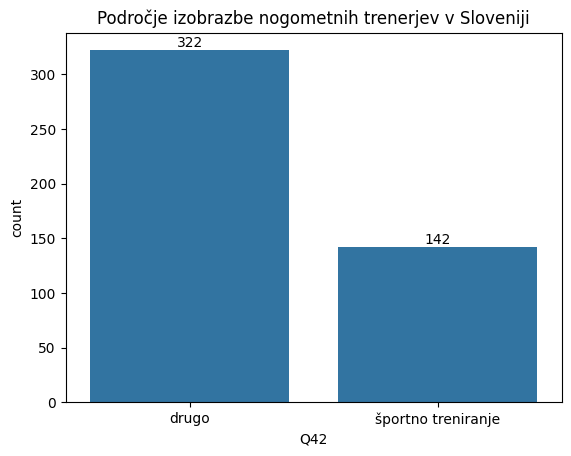

In [91]:
plt.figure()
ax = sns.countplot(data=df, x=podrocje_izobrazbe)
ax.bar_label(ax.containers[0])
plt.title('Področje izobrazbe nogometnih trenerjev v Sloveniji')
plt.show()

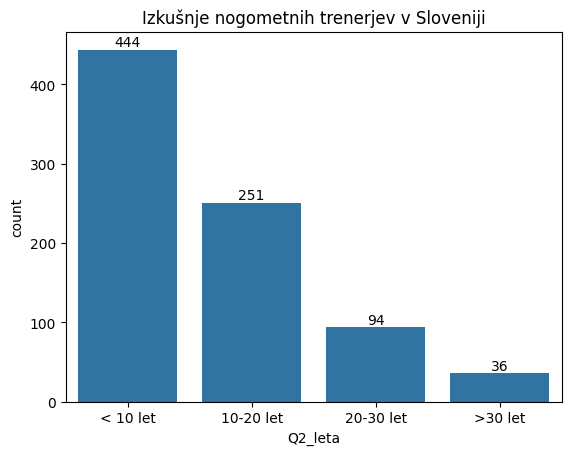

In [92]:
plt.figure()
ax = sns.countplot(data=df, x=trenerske_izkusnje)
ax.bar_label(ax.containers[0])
plt.title('Izkušnje nogometnih trenerjev v Sloveniji')
plt.show()

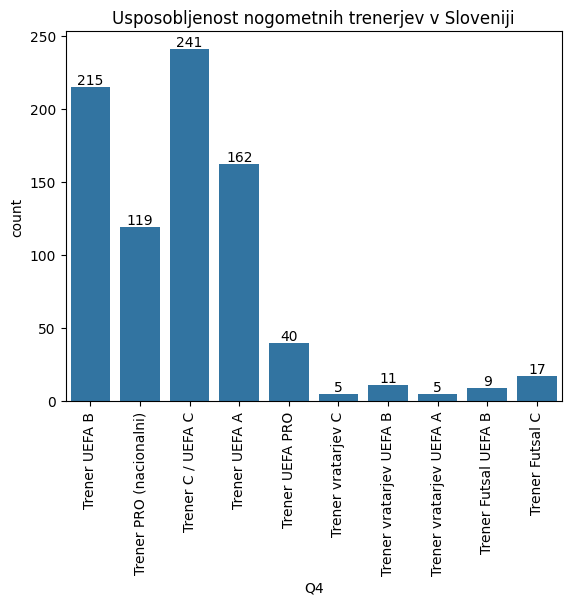

In [93]:
plt.figure()
ax = sns.countplot(data=df_labels[-(df_labels.Q4 == 'neodgovorjeno vprašanje')], x='Q4')
ax.set_xticks(range(len(ax.get_xticklabels())))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.bar_label(ax.containers[0]);
plt.title('Usposobljenost nogometnih trenerjev v Sloveniji')
plt.show()

#### Grafa, ki opisujeta ***odnos do poklica***.

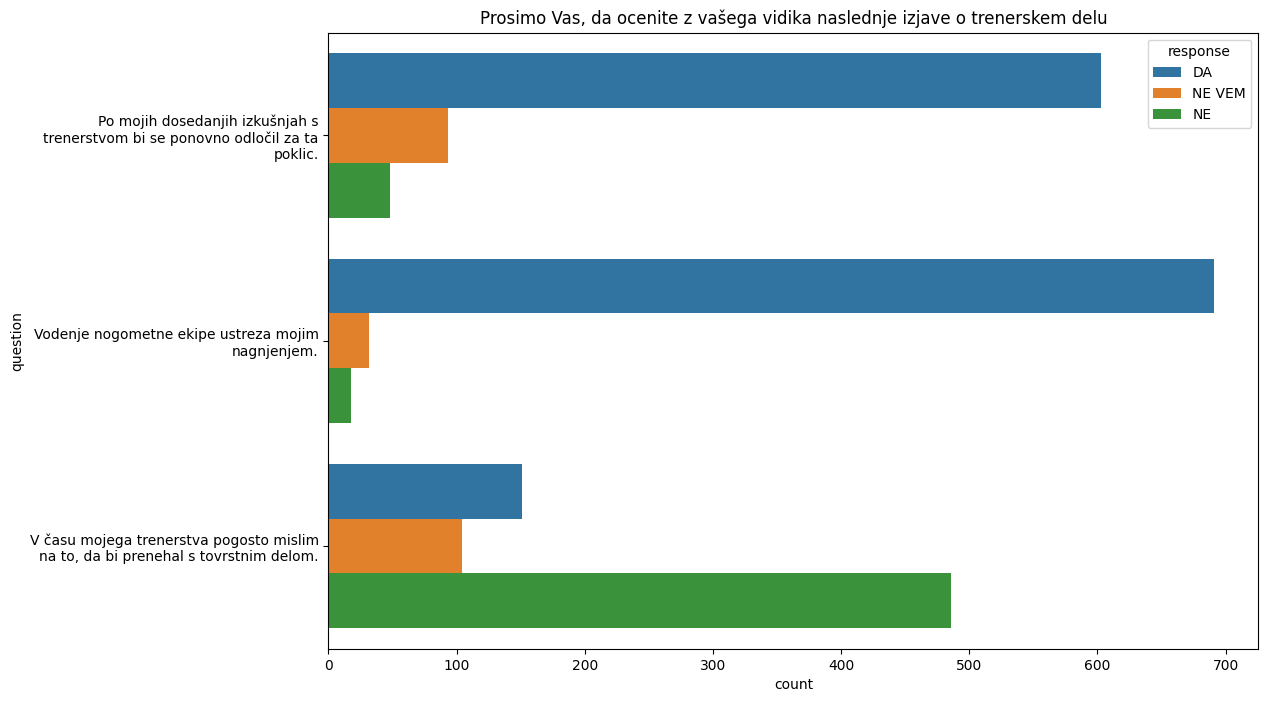

In [95]:
import textwrap

def wrap_labels(labels, width):
    return [textwrap.fill(label, width) for label in labels]

plot_data = pd.DataFrame({
    questions['Q18a']: q18a,
    questions['Q18b']: q18b,
    questions['Q18c']: q18c,
})
df_long = plot_data.melt(var_name='question', value_name='response', ignore_index=True)

plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_long, y='question', hue='response')
wrapped_labels = wrap_labels(df_long.question.drop_duplicates(), width=40)
ax.set_yticks(range(len(wrapped_labels)))
ax.set_yticklabels(wrapped_labels)
plt.title('Prosimo Vas, da ocenite z vašega vidika naslednje izjave o trenerskem delu');

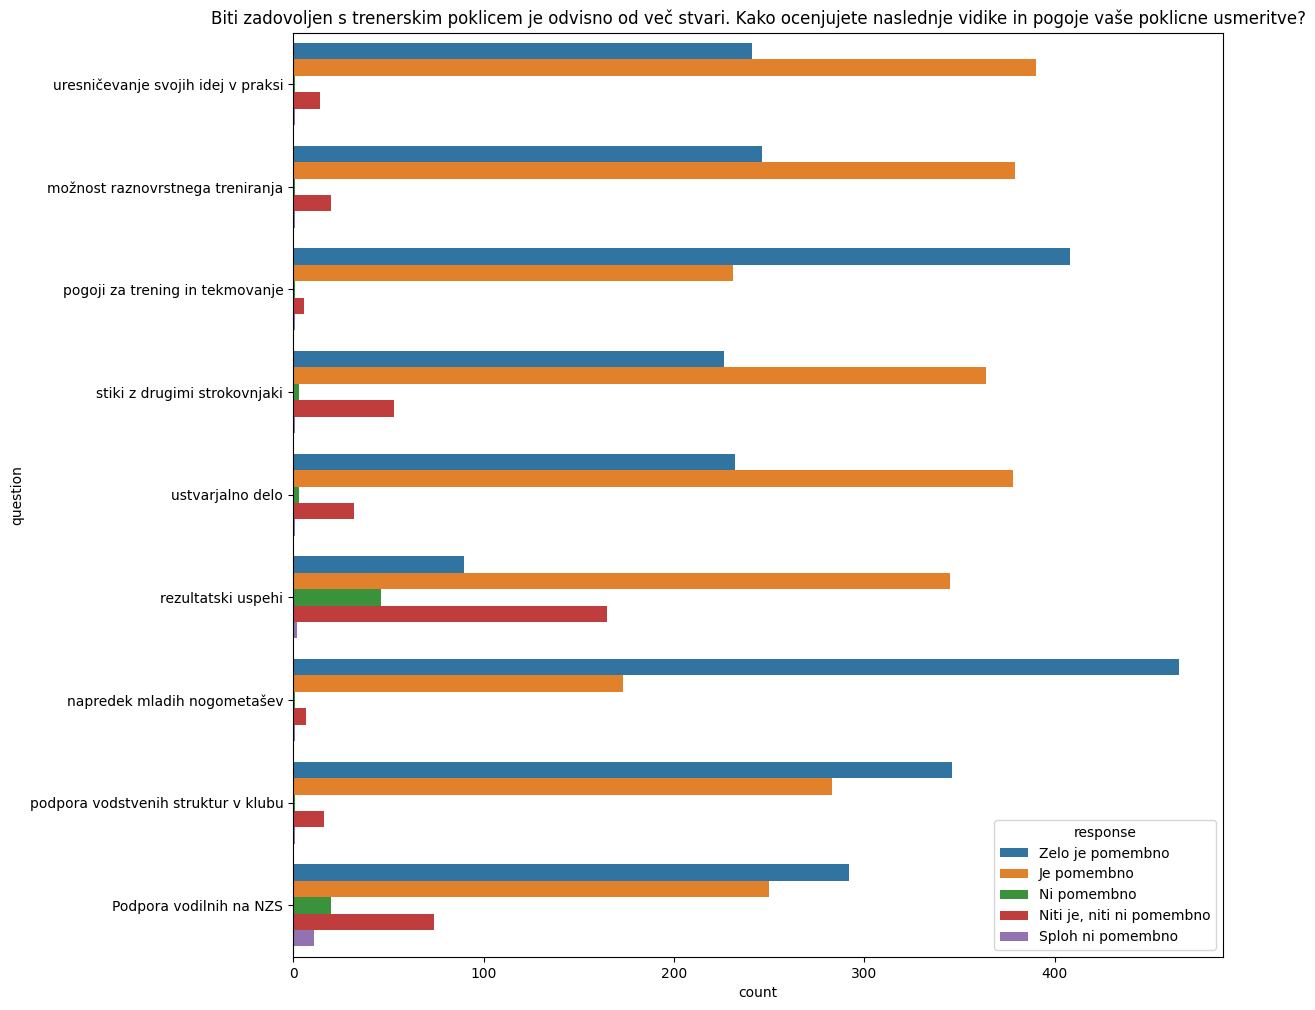

In [50]:
df_q23 = pd.DataFrame(q23[x] for x in range(9))
df_q23['question'] = [questions[que] for que in q23_labels]
df_q23.set_index('question', inplace=True)

df_long = df_q23.reset_index().melt(id_vars='question', var_name='respondent', value_name='response')

fig = plt.figure(figsize=(12,12))
sns.countplot(data=df_long, y='question', hue='response');
plt.title('Biti zadovoljen s trenerskim poklicem je odvisno od več stvari. Kako ocenjujete naslednje vidike in pogoje vaše poklicne usmeritve?');


#### Graf, ki prikazuje ***glavne probleme pri delu***.

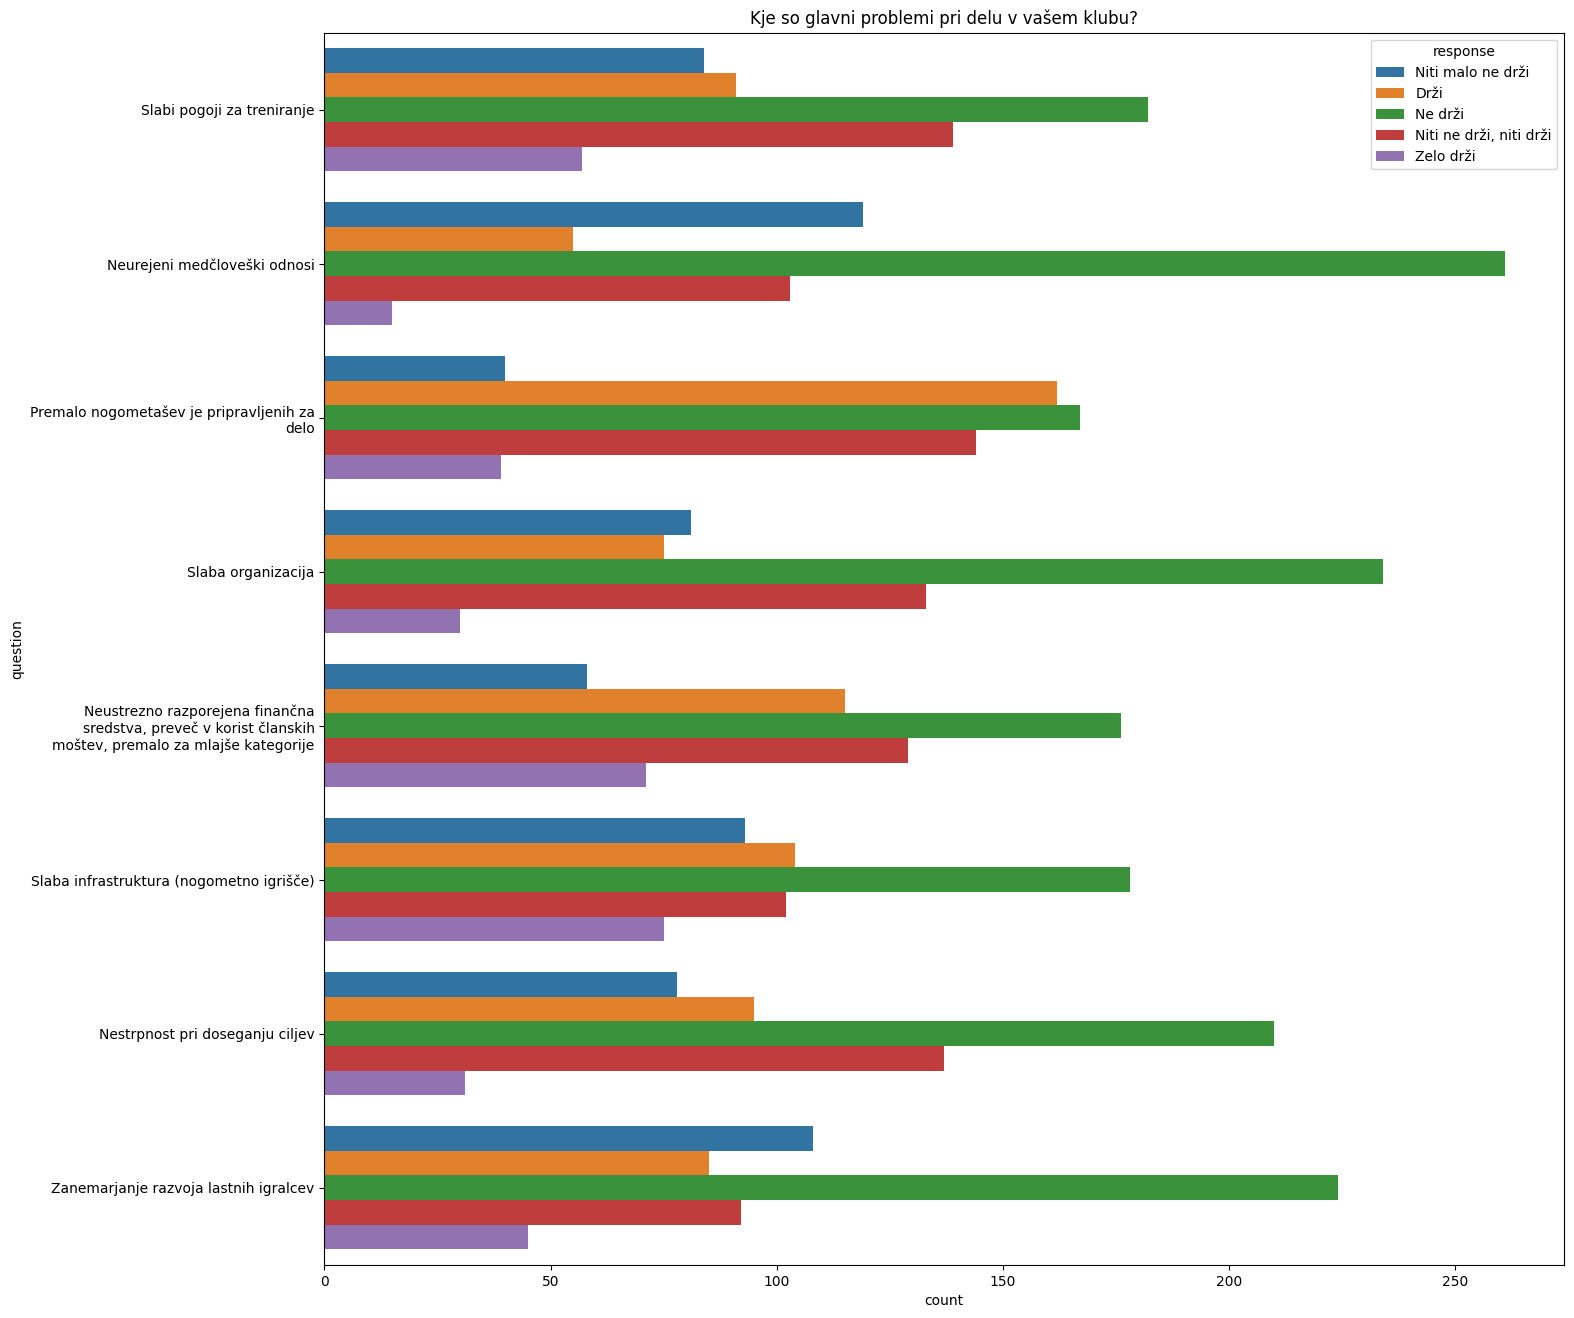

In [80]:
df_q32 = pd.DataFrame(q32[x] for x in range(8))
df_q32['question'] = [questions[que] for que in q32_labels]
df_q32.set_index('question', inplace=True)

df_long = df_q32.reset_index().melt(id_vars='question', var_name='respondent', value_name='response')

fig = plt.figure(figsize=(16,16))
ax = sns.countplot(data=df_long, y='question', hue='response');

wrapped_labels = wrap_labels(df_long.question.drop_duplicates(), width=40)
ax.set_yticks(range(len(wrapped_labels)))
ax.set_yticklabels(wrapped_labels)
plt.title('Kje so glavni problemi pri delu v vašem klubu?');